In [1]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

print("Librerias importadas correctamente")

Librerias importadas correctamente


In [2]:
print("descargando datos")
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("cargando datos")
df = pd.read_csv(f"{path}/WA_Fn-useC_-Telco-Customer-churn.csv")
print(f"\n Dataset cargado")
print(f"dimensiones: {df.shape[0]} y {df.shape[1]} colummnas")

descargando datos
cargando datos

 Dataset cargado
dimensiones: 7043 y 21 colummnas


In [ ]:
#vamos a ver las primeras 5 filas del dataset 
df.head


In [ ]:
print("info del dataset")
df.info()

In [ ]:
#estadistica de las variables 
df.describe()

In [ ]:
#cuantos clientes se fueron vs se quedaron?
#hacemos grafica de barras
plt.figure(figsize =(8,5))
df["Churn"].value_counts().plot(kind = "bar", color=["#2ecc71","#e74c3c"])
#lo personalizamos 
plt.title("Distribucion de clientes que se fueron vs se quedaron", fontsize = 14, fontweight = "bold")
plt.xlabel("churn")
plt.ylabel("numero de clientes")
plt.xticks(rotation = 0) 
plt.grid(axis = "y", alpha = 0.3)
#calculamos porcentajes
churn_counts = df['Churn'].value_counts()

In [ ]:
#que contrato tiene más abandono?
plt.figure(figsize = (10,5))
pd.crosstab(df["Contract"], df["Churn"], normalize = "index").plot(kind ="bar", stacked = True)
plt.title("tasa de churn por tipo de contrato", fontsize = 14, fontweight = "bold")
plt.xlabel("tipo de contrato")
plt.ylabel("proporcion")
plt.xticks(rotation = 30)
plt.legend(title = "churn", labels = ["No", "Yes"])
plt.tight_layout()
plt.show

In [ ]:
#los clientes nuevos se van mas?
plt.figure(figsize = (10,5))
df.boxplot(column = "tenure", by = "Churn", figsize = (8,5))
plt.title("Antiguedad del cliente vs cantidad de churn")
plt.suptitle("")
plt.xlabel("churn")
plt.ylabel("antiguedad del cliente")
plt.show()


In [ ]:
#hay valores faltantes
print("valores faltantes\n")
missing = df.isnull().sum()
print(missing[missing > 0])
if missing.sum() == 0:
    print("no hay valores faltantes")
else: 
    print("hay valores faltantes")


In [3]:
# PASO 1: Convertir Churn PRIMERO
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Churn convertido:")
print(df['Churn'].value_counts())


df = df.drop(['customerID'], axis=1)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print(f"customerID eliminado y TotalCharges limpiado")

Churn convertido:
Churn
0    5174
1    1869
Name: count, dtype: int64
customerID eliminado y TotalCharges limpiado


In [ ]:
print("columnas")
print(df.columns.tolist())
print(f"\nTotal de columnas:{len(df.columns)}")

In [4]:
# Codificar variables categóricas
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Variables codificadas: {df_encoded.shape}")

Variables codificadas: (7043, 31)


In [5]:
#eliminemos columnas que no vamos a usar 
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

print(f"Datos preparados:")
print(f"X (predictores): {X.shape}")
print(f"y (objetivo): {y.shape}")

Datos preparados:
X (predictores): (7043, 30)
y (objetivo): (7043,)


In [6]:
#vamos a dividir los datos de entrenamientos usando la herramienta train_test_split 80% entrenamiento y 20% prueba 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("datos obtenidos") 
print(f"{x_train.shape[0]}clientes")
print(f"{x_test.shape[0]}clientes")

datos obtenidos
5634clientes
1409clientes


In [10]:
# Regresión Logística para predecir Customer Churn
# Detecta patrones: clientes con tenure bajo, precio alto y contrato mensual tienden a irse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelo_lr = LogisticRegression(max_iter=5000, random_state=42)
modelo_lr.fit(x_train, y_train)

y_pred_lr = modelo_lr.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Modelo entrenado")
print(f"Precision: {accuracy_lr:.2%}")

Modelo entrenado
Precision: 82.26%


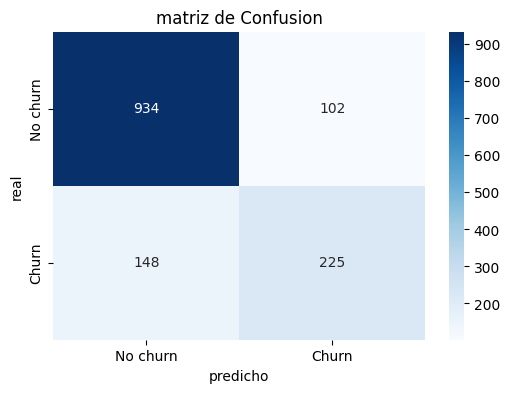


 reporte de clasificacion:
              precision    recall  f1-score   support

    No Churn       0.86      0.90      0.88      1036
       Churn       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [13]:
#hacemos a una matriz de confusion para ver como funciona nuestro modelo 
import seaborn as sns 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_lr)
#dibujamos 
plt.figure(figsize = (6,4))
#creamos un heatmap 
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["No churn", "Churn"], yticklabels = ["No churn", "Churn"])
plt.title('matriz de Confusion')
plt.ylabel('real')
plt.xlabel('predicho')
plt.show()

print("\n reporte de clasificacion:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))


In [ ]:
### interpretamos 
- 934 verdaderos negativos 
-225 verdaderos positivos 
- total: 1159 de 1409 (82.3 efectividad)
- cuantos churns se detectaron: 225/ 373 = 60%
- de los que dijo que si eran churn cuantos genuinamiene si eran: 225/ 327 = 68%
- el modelo es bueno detectando detectando los no churn pero los churn prefiere predecir que es un no churn a un churn 

### Hallazgos clave:
1. El modelo detecta correctamente el 82% de los casos
2. Identifica 225 clientes en riesgo de abandono (pueden ser salvados)
3. Pierde 148 clientes (40% de los que se van) - área de mejora

### Impacto de Negocio:
- **Clientes salvados:** 225 × $100/mes = $22,500/mes en ingresos retenidos
- **Clientes perdidos:** 148 × $100/mes = $14,800/mes en pérdidas
- **ROI potencial:** Retención de ~$270,000/año

### Recomendaciones:
1. Implementar campañas de retención para los 225 clientes de alto riesgo
2. Mejorar el modelo (probar Random Forest o XGBoost) para aumentar recall
3. Analizar en detalle las características de los 148 falsos negativos
4. Establecer sistema de alertas tempranas cuando tenure < 12 meses

### Próximos pasos:
- Probar algoritmos más avanzados (Random Forest, XGBoost)
- Hacer feature engineering (crear nuevas variables)
- Optimizar el threshold para balance precision/recall
- Deployment del modelo en producción